# Import Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

### Load Dataset

In [2]:
df = pd.read_csv("C:\\Users\\savita\\Downloads\\Instagram_Analytics.csv")
df.head()

,post_id,upload_date,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,engagement_rate,content_category
0,IG0000001,2024-11-30 09:25:22.954916,Reel,31627,7559,4530,6393,615036,1007750,1340,3,899,Home Feed,4.97,Technology
1,IG0000002,2025-08-15 09:25:22.954916,Photo,63206,3490,1680,6809,1237071,1345900,1351,20,805,Hashtags,5.59,Fitness
2,IG0000003,2025-09-11 09:25:22.954916,Reel,94373,3727,1761,8367,1127470,1305369,242,24,758,Reels Feed,8.29,Beauty
3,IG0000004,2025-09-18 09:25:22.954916,Reel,172053,7222,2875,9290,764030,897874,446,11,402,External,21.32,Music
4,IG0000005,2025-03-21 09:25:22.954916,Video,99646,2703,4444,9746,7004,495406,1905,8,155,Profile,23.52,Technology


### Shape and Information of dataset

In [3]:
print(f'Shape of Dataset : {df.shape}','\n')

print(f'Information of Data : {df.info()}')

Shape of Dataset : (29999, 15) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_id           29999 non-null  object 
 1   upload_date       29999 non-null  object 
 2   media_type        29999 non-null  object 
 3   likes             29999 non-null  int64  
 4   comments          29999 non-null  int64  
 5   shares            29999 non-null  int64  
 6   saves             29999 non-null  int64  
 7   reach             29999 non-null  int64  
 8   impressions       29999 non-null  int64  
 9   caption_length    29999 non-null  int64  
 10  hashtags_count    29999 non-null  int64  
 11  followers_gained  29999 non-null  int64  
 12  traffic_source    29999 non-null  object 
 13  engagement_rate   29999 non-null  float64
 14  content_category  29999 non-null  object 
dtypes: float64(1), int64(9), object(5)
memory usage: 3.4+ 

### Statistical Analysis

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
likes,29999.0,9.991266e+04,57905.967401,7.00,49755.00,99580.00,150225.00,200000.00
comments,29999.0,5.017781e+03,2888.404881,0.00,2530.50,5042.00,7518.00,10000.00
shares,29999.0,2.502913e+03,1448.320395,0.00,1246.00,2498.00,3768.00,5000.00
saves,29999.0,7.490125e+03,4352.546949,0.00,3690.50,7483.00,11294.00,15000.00
reach,29999.0,9.965616e+05,577790.643192,165.00,493681.00,992181.00,1494798.00,1999865.00
impressions,29999.0,1.246669e+06,597092.365465,5107.00,746958.50,1241026.00,1749263.50,2497940.00
caption_length,29999.0,1.103111e+03,635.991308,0.00,555.00,1100.00,1656.00,2200.00
hashtags_count,29999.0,1.488743e+01,9.005811,0.00,7.00,15.00,23.00,30.00
followers_gained,29999.0,5.021528e+02,290.364038,0.00,251.00,501.00,755.00,1000.00
engagement_rate,29999.0,1.441928e+01,29.660210,0.12,5.18,9.19,15.67,3259.82


### Missing values find

In [5]:
df.isnull().sum()

post_id             0
upload_date         0
media_type          0
likes               0
comments            0
shares              0
saves               0
reach               0
impressions         0
caption_length      0
hashtags_count      0
followers_gained    0
traffic_source      0
engagement_rate     0
content_category    0
dtype: int64

### Checks duplicated values

In [6]:
df.duplicated().sum()

np.int64(0)

# Data Preprocessing

### Drop Irrelevant Features

In [7]:
df.drop(columns=['upload_date', 'post_id'], axis=1, inplace=True)


In [8]:
df.head()

,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,engagement_rate,content_category
0,Reel,31627,7559,4530,6393,615036,1007750,1340,3,899,Home Feed,4.97,Technology
1,Photo,63206,3490,1680,6809,1237071,1345900,1351,20,805,Hashtags,5.59,Fitness
2,Reel,94373,3727,1761,8367,1127470,1305369,242,24,758,Reels Feed,8.29,Beauty
3,Reel,172053,7222,2875,9290,764030,897874,446,11,402,External,21.32,Music
4,Video,99646,2703,4444,9746,7004,495406,1905,8,155,Profile,23.52,Technology


### Processing Numerical Features

In [9]:
numeric_features = df.select_dtypes(include=np.number).columns
                   
numeric_features

Index(['likes', 'comments', 'shares', 'saves', 'reach', 'impressions',
       'caption_length', 'hashtags_count', 'followers_gained',
       'engagement_rate'],
      dtype='object')

## EDA Analysis

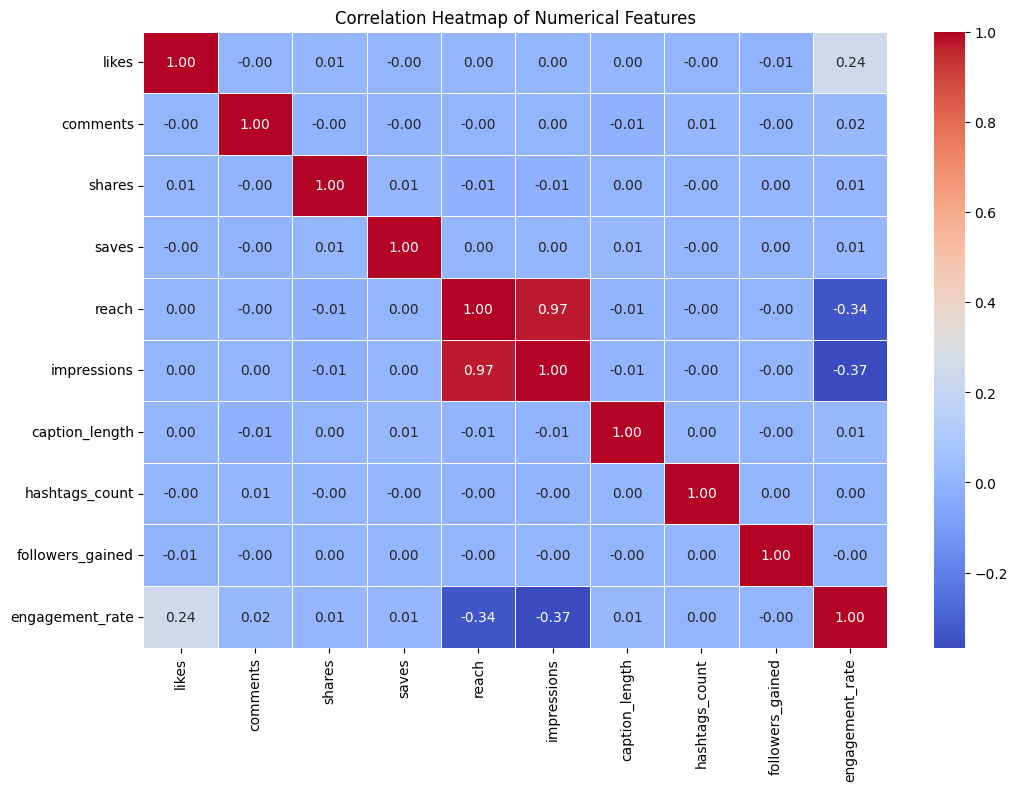

In [10]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [11]:
df.drop(columns='reach', axis=1, inplace=True)

In [12]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

vif_before = calculate_vif(df.drop(columns='engagement_rate').select_dtypes(include=['int64','float64']))

def highlight_high_vif(val):
    color = 'red' if val>10 else ''
    return f'Background-color:{color}'


vif_styled = vif_before.style.applymap(highlight_high_vif, subset=['VIF'])
vif_styled

C:\Users\savita\AppData\Local\Temp\ipykernel_23256\280776002.py:14: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  vif_styled = vif_before.style.applymap(highlight_high_vif, subset=['VIF'])


,Feature,VIF
0,likes,3.525934
1,comments,3.544333
2,shares,3.525013
3,saves,3.527743
4,impressions,4.436121
5,caption_length,3.547436
6,hashtags_count,3.349186
7,followers_gained,3.530305


### Checking for Outliers

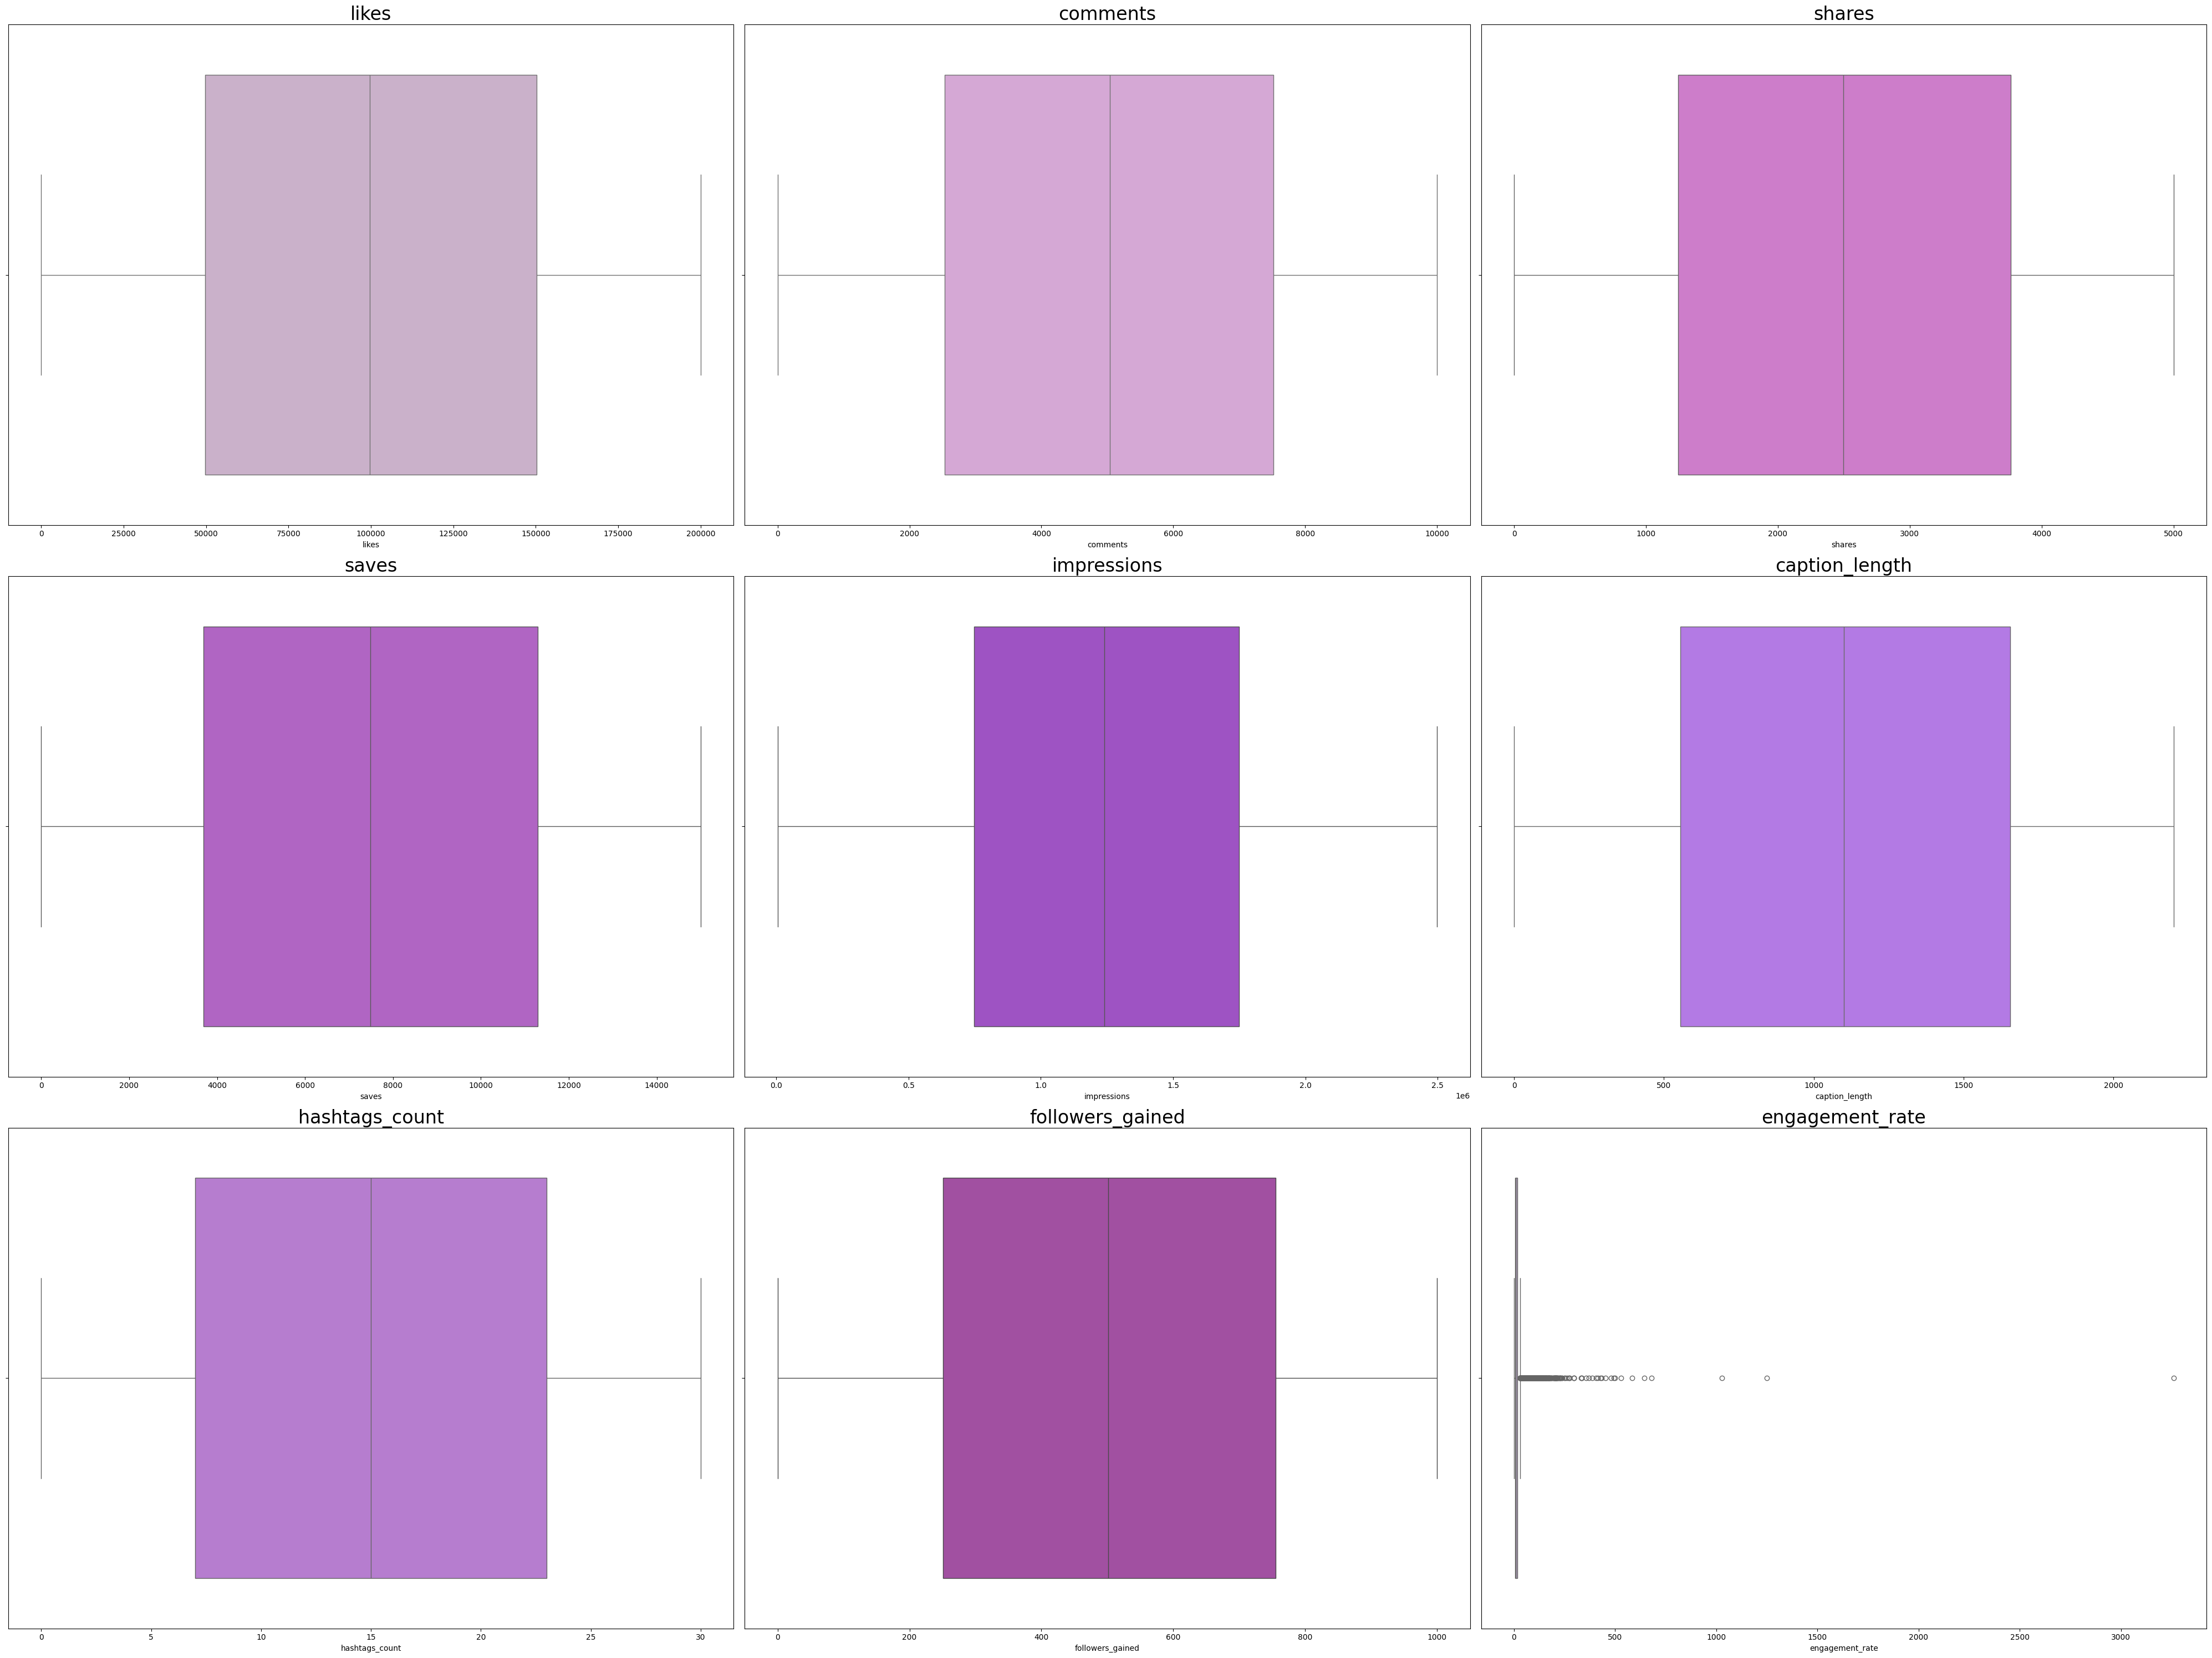

In [13]:
rows, cols = 3,3
custom_palette = ["#CEADCE", '#DDA0DD', '#DA70D6', '#BA55D3', "#A441D5", "#B469F5", "#BB70DC", "#AF42AF", "#AC98BA"]
fig, axes = plt.subplots(rows, cols, figsize=(40, 30))
axes = axes.flatten()
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    if i < len(axes):
        sns.boxplot(x=df[col], ax=axes[i], color=custom_palette[i % len(custom_palette)])
        axes[i].set_title(col, fontsize=24)
plt.tight_layout()
plt.show()

### Check data skewness

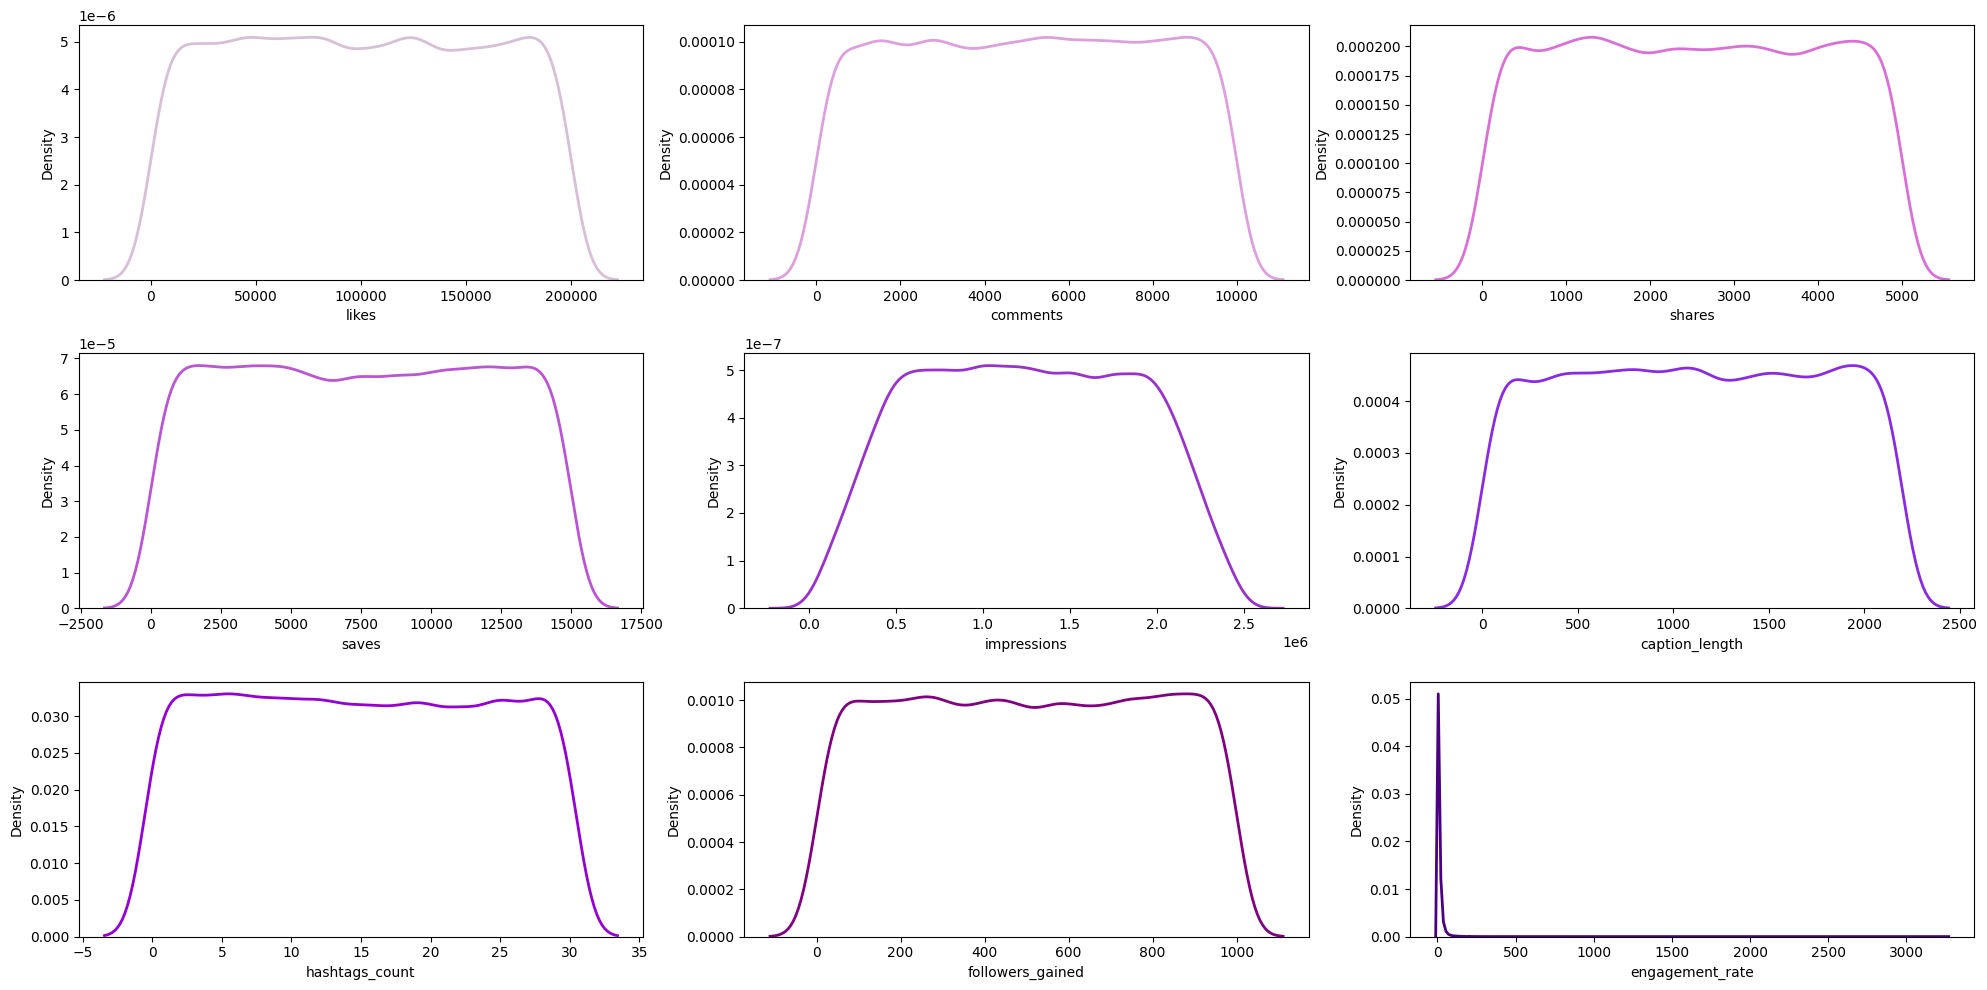

In [14]:
df_to_plot = df.select_dtypes(include=['float64', 'int64']).dropna()
numeric_cols = df_to_plot.columns


custom_palette = ['#D8BFD8', '#DDA0DD', '#DA70D6', '#BA55D3', '#9932CC', '#8A2BE2', '#9400D3', '#800080', '#4B0082']

plt.figure(figsize=(20,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3,3,i+1)
    sns.kdeplot(df_to_plot[col], 
                linewidth=2, 
                color=custom_palette[i % len(custom_palette)])
    
plt.tight_layout()

In [15]:
def apply_skewness_correction(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    for col in numeric_cols:
        col_skewness = skew(df[col].dropna())

        if col_skewness > 1:
            df = fix_skewness(df, col, method='log')
        elif 0.5 < col_skewness <= 1:
            df = fix_skewness(df, col, method='sqrt')
        elif col_skewness < -1:
            df = fix_skewness(df, col, method='boxcox')
    return df

def fix_skewness(df2, column_name, method):
    if method == 'log':
        df2[column_name] = np.log1p(df2[column_name])
    elif method == 'sqrt':
        df2[column_name] = np.sqrt(df2[column_name])
    elif method == 'boxcox':
        df2[column_name], _ = stats.boxcox(df2[column_name] + 1)
    else:
        raise ValueError("Unsupported method. Choose from 'log', 'sqrt', 'boxcox'.")
    return df2

target = df[['engagement_rate']]
df = apply_skewness_correction(df.drop(columns=['engagement_rate']))

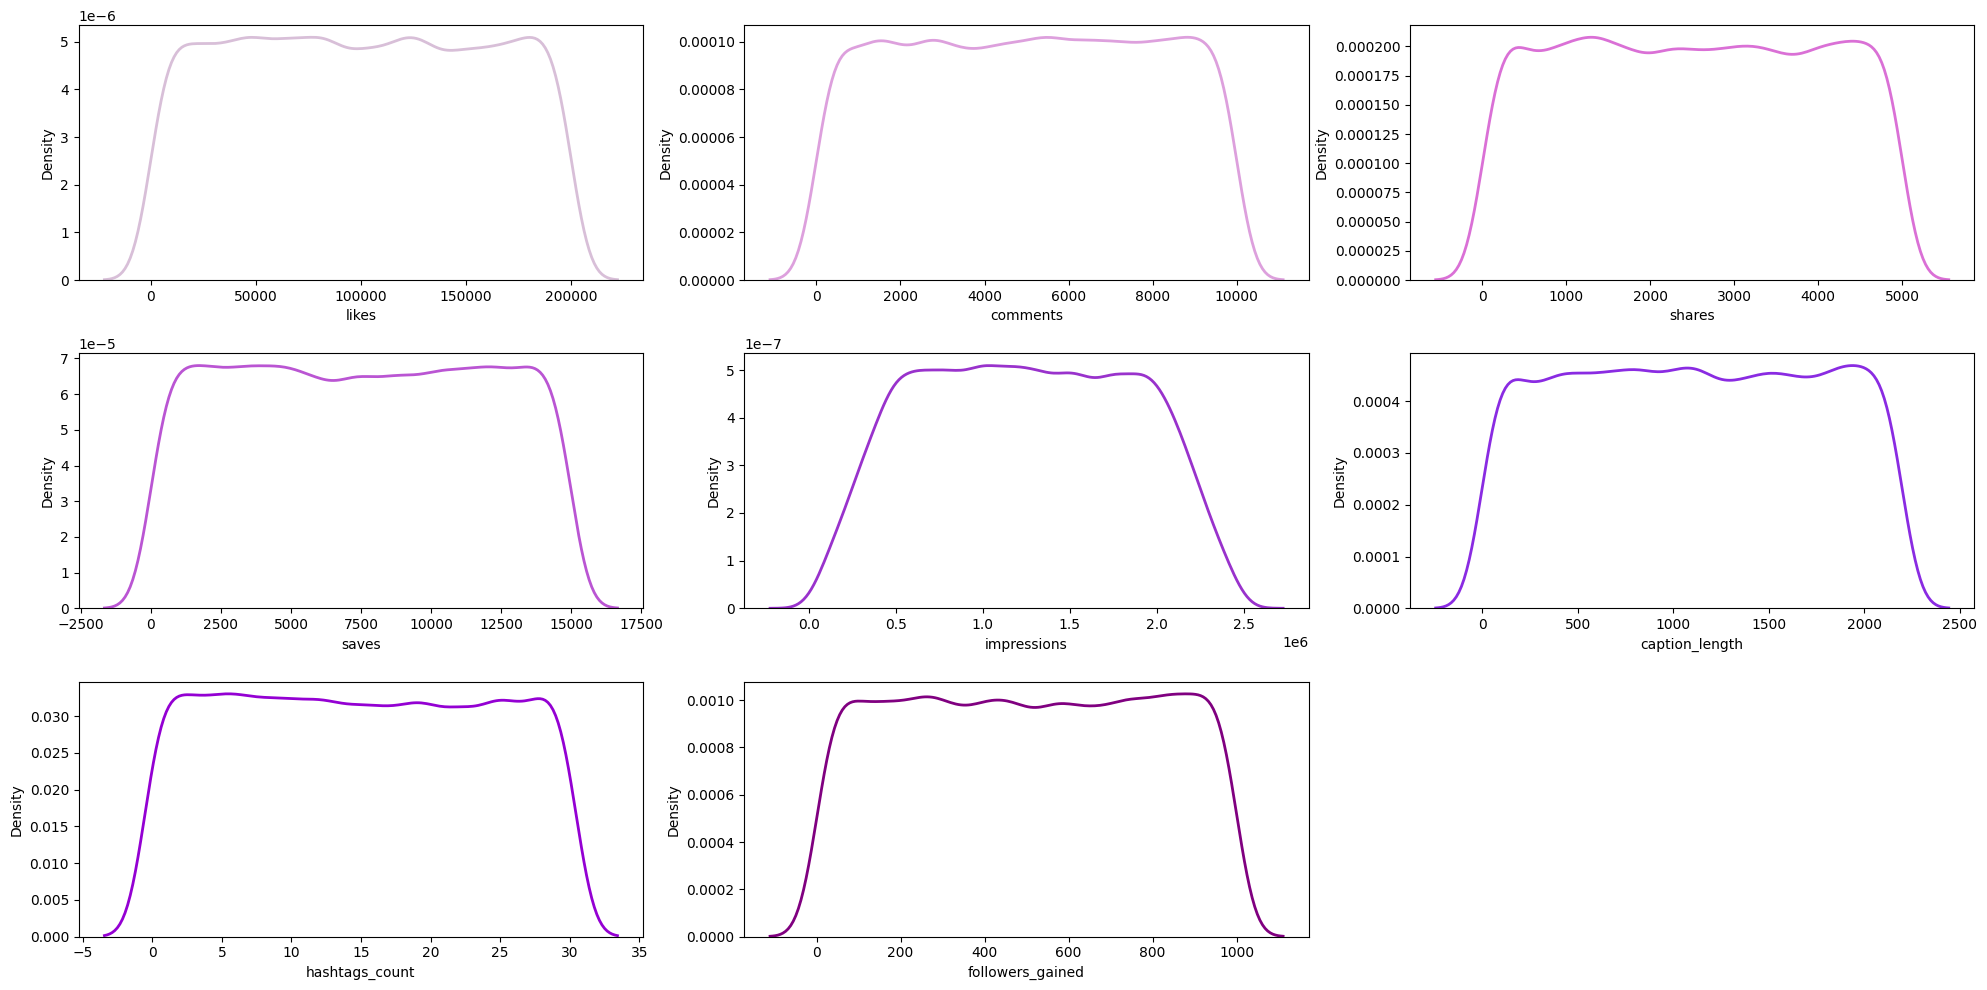

In [16]:
df_to_plot = df.select_dtypes(include=['float64', 'int64']).dropna()
numeric_cols = df_to_plot.columns


custom_palette = ['#D8BFD8', '#DDA0DD', '#DA70D6', '#BA55D3', '#9932CC', '#8A2BE2', '#9400D3', '#800080', '#4B0082']

plt.figure(figsize=(20,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3,3,i+1)
    sns.kdeplot(df_to_plot[col], 
                linewidth=2, 
                color=custom_palette[i % len(custom_palette)])
    
plt.tight_layout()

In [17]:
df['engagement_rate'] = target
df.head()

,media_type,likes,comments,shares,saves,impressions,caption_length,hashtags_count,followers_gained,traffic_source,content_category,engagement_rate
0,Reel,31627,7559,4530,6393,1007750,1340,3,899,Home Feed,Technology,4.97
1,Photo,63206,3490,1680,6809,1345900,1351,20,805,Hashtags,Fitness,5.59
2,Reel,94373,3727,1761,8367,1305369,242,24,758,Reels Feed,Beauty,8.29
3,Reel,172053,7222,2875,9290,897874,446,11,402,External,Music,21.32
4,Video,99646,2703,4444,9746,495406,1905,8,155,Profile,Technology,23.52


In [18]:
df['media_type'].value_counts()

media_type
Carousel    7526
Video       7523
Reel        7515
Photo       7435
Name: count, dtype: int64

In [19]:
df['traffic_source'].value_counts()

traffic_source
Home Feed     5069
Hashtags      5063
Reels Feed    5026
External      5005
Profile       4962
Explore       4874
Name: count, dtype: int64

In [20]:
df['content_category'].value_counts()


content_category
Photography    3035
Fashion        3034
Technology     3025
Lifestyle      3017
Food           3010
Fitness        3004
Music          3003
Travel         2968
Beauty         2953
Comedy         2950
Name: count, dtype: int64

In [21]:
le = LabelEncoder()

cols = ['media_type', 'traffic_source', 'content_category']

for col in cols:
    df[col] = le.fit_transform(df[col])

In [22]:
df.head()

,media_type,likes,comments,shares,saves,impressions,caption_length,hashtags_count,followers_gained,traffic_source,content_category,engagement_rate
0,2,31627,7559,4530,6393,1007750,1340,3,899,3,8,4.97
1,1,63206,3490,1680,6809,1345900,1351,20,805,2,3,5.59
2,2,94373,3727,1761,8367,1305369,242,24,758,5,0,8.29
3,2,172053,7222,2875,9290,897874,446,11,402,1,6,21.32
4,3,99646,2703,4444,9746,495406,1905,8,155,4,8,23.52


In [23]:
x = df.drop(columns=['engagement_rate','traffic_source'], axis=1)
y = df['engagement_rate']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [25]:
x

,media_type,likes,comments,shares,saves,impressions,caption_length,hashtags_count,followers_gained,content_category
0,2,31627,7559,4530,6393,1007750,1340,3,899,8
1,1,63206,3490,1680,6809,1345900,1351,20,805,3
2,2,94373,3727,1761,8367,1305369,242,24,758,0
3,2,172053,7222,2875,9290,897874,446,11,402,6
4,3,99646,2703,4444,9746,495406,1905,8,155,8
...,...,...,...,...,...,...,...,...,...,...
29994,3,46046,8354,3847,11095,820688,1254,18,124,9
29995,0,67711,3266,458,12380,2218288,1427,4,310,0
29996,1,52326,7328,3687,7619,2447893,713,4,223,7
29997,0,158113,5890,2573,6329,2001092,1341,22,978,8


In [26]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [27]:
model = RandomForestRegressor()

results = []

model.fit(x_train_scaled, y_train)
y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

results.append({
    "Model": "Random Forest",
    "Train RMSE": train_rmse,
    "Test RMSE": test_rmse,
    "Train R2": train_r2,
    "Test R2": test_r2
})

results_df = pd.DataFrame(results)
results_df

c:\Projects\Data Science Projects\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,Model,Train RMSE,Test RMSE,Train R2,Test R2
0,Random Forest,2.089986,50.158435,0.990928,-0.018125


In [28]:

# Get feature importance
importances = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance.head(10))

            Feature  Importance
5       impressions    0.771211
1             likes    0.213863
4             saves    0.005191
8  followers_gained    0.001853
2          comments    0.001558
3            shares    0.001538
6    caption_length    0.001474
7    hashtags_count    0.001382
9  content_category    0.001184
0        media_type    0.000746


In [29]:
model = XGBRegressor()

results = []

model.fit(x_train_scaled, y_train)
y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

results.append({
    "Model": "XGBoost",
    "Train RMSE": train_rmse,
    "Test RMSE": test_rmse,
    "Train R2": train_r2,
    "Test R2": test_r2
})

results_df = pd.DataFrame(results)
results_df

,Model,Train RMSE,Test RMSE,Train R2,Test R2
0,XGBoost,0.28285,50.082472,0.999834,-0.015044
